PRUEBA DEL EJERCICIO 1 DEL DATA CHALENGE 2022 CON UN ARLBOL DE DESICIONES  

In [59]:
#CARGANDO LOS DATOS DEL CSV
import pandas as pd
import numpy as np

SPI = pd.read_csv('SPI_training_0.csv')
AOI = pd.read_csv('AOI_training.csv')
SPItest = pd.read_csv('SPI_testing_0.csv')
SPItest = SPItest.iloc[:,[0,1,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]]
AOItest = pd.read_csv('AOI_testing.csv')
AOI_Label = AOI.iloc[:,[0,1,3,4]]

AOItest_Label = AOItest.iloc[:,[0,1,3,5]]


In [60]:
#Transformo AOI_Label en una sola clase
AOI_Label['AOILabel']  = 0
AOItest_Label['AOILabel'] = 0

In [61]:
#CODIFICANDO E IMPORTANDO SKL
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

encoder = LabelEncoder()
#SPI
SPI['FigureID'] = encoder.fit_transform(SPI['FigureID'])+1
SPI['PanelID'] = encoder.fit_transform(SPI['PanelID'])
SPI['ComponentID'] = encoder.fit_transform(SPI['ComponentID'])
SPI['Result'] = encoder.fit_transform(SPI['Result'])
SPItest['FigureID'] = encoder.fit_transform(SPItest['FigureID'])+1
SPItest['PanelID'] = encoder.fit_transform(SPItest['PanelID'])
SPItest['ComponentID'] = encoder.fit_transform(SPItest['ComponentID'])
SPItest['Result'] = encoder.fit_transform(SPItest['Result'])
#AOI
AOI_Label['FigureID'] = encoder.fit_transform(AOI_Label['FigureID'])
AOI_Label['PanelID'] = encoder.fit_transform(AOI_Label['PanelID'])
AOI_Label['ComponentID'] = encoder.fit_transform(AOI_Label['ComponentID'])
AOItest_Label['FigureID'] = encoder.fit_transform(AOItest_Label['FigureID'])
AOItest_Label['PanelID'] = encoder.fit_transform(AOItest_Label['PanelID'])
AOItest_Label['ComponentID'] = encoder.fit_transform(AOItest_Label['ComponentID'])


In [62]:
#Uniendo y reduciendo las tablas SPI 
Predict_trainig = SPI.merge(AOI_Label,how = 'left' )
Predict_trainig1 = Predict_trainig.iloc[0:200000,:]
Predict_trainig2 = Predict_trainig.dropna()
Predict_trainig = pd.concat([Predict_trainig1,Predict_trainig2], axis=0)
Predict_trainig['AOILabel'] = encoder.fit_transform(Predict_trainig['AOILabel'])
Predict_trainig.to_csv('Predict_trainig.csv')


In [63]:
#Uniendo las tablas AOI
Predict_testing = SPItest.merge(AOItest_Label,how = 'left' )
Predict_testing.to_csv('Predict_testing.csv')
Predict_testing['AOILabel'] = encoder.fit_transform(Predict_testing['AOILabel'])

In [64]:
# features and labels
X_train = Predict_trainig.iloc[:,5:18]
y_train = Predict_trainig.iloc[:,18]

X_test = Predict_testing.iloc[:,5:18]
y_test = Predict_testing.iloc[:,18]


In [65]:
#Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

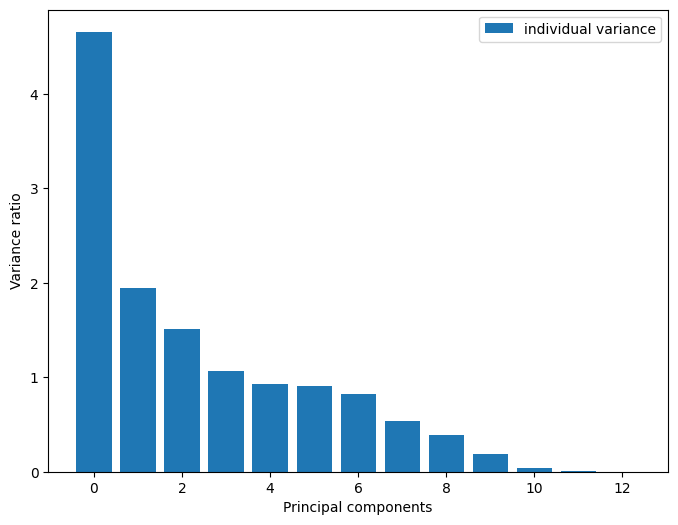

In [66]:
# Visualize
pca = PCA()
pca.fit_transform(X_train)
pca_variance = pca.explained_variance_

plt.figure(figsize=(8, 6))
plt.bar(range(13), pca_variance, alpha=1, align='center', label="individual variance")
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

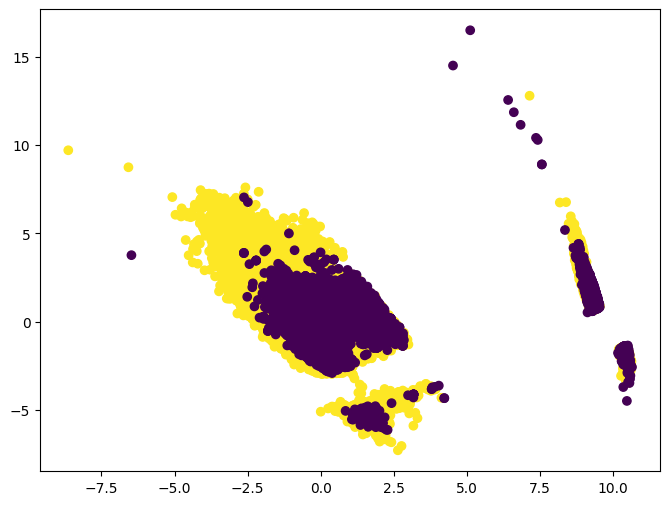

In [67]:

pca2 = PCA(n_components=2)
pca2.fit(X_train)
x_3d = pca2.transform(X_train)

plt.figure(figsize=(8,6))
plt.scatter(x_3d[:,0],x_3d[:,1] , c=Predict_trainig['AOILabel'])
plt.show()

In [85]:
from sklearn.tree import DecisionTreeClassifier

# Configuración del modelo
Predict_TREE = DecisionTreeClassifier(criterion ='gini', 
                                    max_depth = 10, 
                                    random_state = 1)
# Ajuste del modelo. Entrenamiento
Predict_TREE.fit(X_train, y_train)


# Precision global de clasificación corecta
print('Train Accuracy : %.5f' % Predict_TREE.score(X_train, y_train))
print('Test Accuracy : %.5f' % Predict_TREE.score(X_test, y_test))

Train Accuracy : 0.95181
Test Accuracy : 0.96544


[Text(0.5, 1.0, 'RF2022'),
 Text(0.5, 0, 'Clases predichas'),
 Text(0, 0.5, 'Clases verdaderas')]

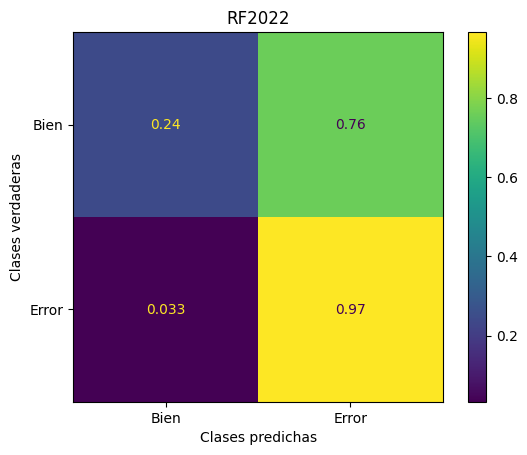

In [69]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = Predict_TREE.predict(X_test)
cm = confusion_matrix(y_test, y_pred, normalize= 'true')

cm_display = ConfusionMatrixDisplay(cm, display_labels= ['Bien','Error'])
cm_display.plot()
cm_display.ax_.set(title = 'RF2022', xlabel = 'Clases predichas' , ylabel = 'Clases verdaderas')


In [70]:
Predict_testing

,PanelID,FigureID,ComponentID,PadID,PadType,Volume(%),Height(um),Area(%),OffsetX(%),OffsetY(%),SizeX,SizeY,Volume(um3),Area(um2),Shape(um),PosX(mm),PosY(mm),Result,AOILabel
0,0,1,0,1.0,0.0,70.585,104.560,101.260,0.030,-0.328,5.10,5.10,2.753875e+09,26337780.0,0.0,55.6,23.6,5,0
1,0,1,0,2.0,0.0,67.545,103.364,98.020,1.122,0.902,5.10,5.10,2.635256e+09,25494920.0,0.0,48.5,23.6,5,0
2,0,1,1,3.0,0.0,62.871,96.632,97.594,0.617,0.393,5.10,5.10,2.452924e+09,25384120.0,0.0,13.4,23.6,5,1
3,0,1,1,4.0,0.0,71.368,106.551,100.470,0.589,0.042,5.10,5.10,2.784422e+09,26132310.0,0.0,20.5,23.6,5,1
4,0,1,2,5.0,0.0,69.718,104.010,100.545,-0.191,-0.284,5.10,5.10,2.720028e+09,26151660.0,0.0,55.6,45.6,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294571,415,4,126,1576.0,0.0,107.162,125.144,102.757,0.438,4.737,1.88,0.58,1.402152e+08,1120430.0,41.5,218.2,22.8,5,1
1294572,415,4,126,1577.0,0.0,104.330,121.028,103.443,1.191,5.375,1.88,0.58,1.365092e+08,1127912.0,40.7,218.2,21.5,5,1
1294573,415,4,126,1578.0,0.0,97.558,116.531,100.463,1.271,5.285,1.88,0.58,1.276488e+08,1095410.0,33.8,218.2,20.3,5,1
1294574,415,4,127,1579.0,0.0,85.464,101.117,101.424,4.300,8.597,0.77,0.47,3.708398e+07,366743.0,34.9,217.7,17.3,5,1


In [86]:
#Prueba

res = Predict_TREE.predict([X_test[0,:]])
print(res)


[0]


NOTA: Cuando aumento la profundidad maxima del arbol por encima de 10 me invierte los resultados.